In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


preparing dataset for basic processing

In [2]:
mail=pd.read_csv('mails.csv',encoding='latin-1')
mail.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [3]:
print('shape = >',mail.shape)

shape = > (2893, 3)


In [4]:
print('ham and spam  counts','\n',mail.label.value_counts())

ham and spam  counts 
 0    2412
1     481
Name: label, dtype: int64


In [5]:
#0 = ham and 1= spam
#there are 2412 ham mails and 481 spam mails

In [6]:
#adding new column to length
mail['length']=mail.message.str.len()
mail.head(5)

,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046


CLEANING THE DATA

In [7]:
#converting message to lower case
mail['message']=mail['message'].str.lower()
mail.head(5)

,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046


In [8]:
#replace email address with 'email'
mail['message']=mail['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

#replace URLs with 'web address'
mail['message']=mail['message'].str.replace(r'^httpp\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\s*)?$','webaddress')

#Replace moneysymbols with 'moneysymb'
mail['message']=mail['message'].str.replace(r'$','dollers')

#replace phone numbers with 'phonenumber
mail['message']=mail['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

#replace numbers with number
mail['message']=mail['message'].str.replace(r'\d+(\.\d+)?','number')

In [9]:
#remove punctuation
mail['message']=mail['message'].str.replace(r'[^\w\d\s]',' ')

#remove whitespace in between terms with single space
mail['message']=mail['message'].str.replace(r'\s+',' ')

#remove leadin and training white space
mail['message']=mail['message'].str.replace(r'^\s+|\s+?$',' ')


In [10]:
mail.head(10)

,subject,message,label,length
0,job posting - apple-iss research center,content length number apple iss research cente...,0,2856
1,NaN,lang classification grimes joseph e and barbar...,0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas sa...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046
5,call for abstracts : optimality in syntactic t...,content length number call for papers is the b...,0,4492
6,m . a . in scandinavian linguistics,m a in scandinavian linguistics at the univers...,0,2201
7,call for papers : linguistics session of the m...,call for papers linguistics session midwest mo...,0,802
8,foreign language in commercials,content length number greetings i m wondering ...,0,1230
9,fulbright announcement : please post / dissemi...,fulbright announcement please post disseminate...,0,1478


In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
### Dataset Preprocessing
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(mail)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', mail['message'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [13]:
corpus

['content length number appl iss research center us doller number million joint ventur appl comput inc institut system scienc nation univers singapor locat singapor look senior speech scientist success candid research expertis comput linguist includ natur languag process english chines statist languag model knowledg state art corpu base n gram languag model cach languag model part speech languag model requir text speech project leader success candid research expertis expertis two follow area comput linguist includ natur languag pars lexic databas design statist languag model text token normal prosod analysi substanti knowledg phonolog syntax semant chines requir knowledg acoust phonet speech signal process desir candid phd least number number year relev work experi technic msc degre least number number year experienc e strong softwar engin skill includ design implement product requir posit knowledg c c unix prefer unix c programm look experienc unix c programm prefer good industri expe

In [14]:
#New column for length after removal of stopwords
mail['clean_length']=mail.message.str.len()
mail.head(10)

,subject,message,label,length,clean_length
0,job posting - apple-iss research center,content length number apple iss research cente...,0,2856,2573
1,NaN,lang classification grimes joseph e and barbar...,0,1800,1711
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas sa...,0,1435,1377
3,risk,a colleague and i are researching the differin...,0,324,316
4,request book information,earlier this morning i was on the phone with a...,0,1046,956
5,call for abstracts : optimality in syntactic t...,content length number call for papers is the b...,0,4492,4169
6,m . a . in scandinavian linguistics,m a in scandinavian linguistics at the univers...,0,2201,2087
7,call for papers : linguistics session of the m...,call for papers linguistics session midwest mo...,0,802,750
8,foreign language in commercials,content length number greetings i m wondering ...,0,1230,1172
9,fulbright announcement : please post / dissemi...,fulbright announcement please post disseminate...,0,1478,1421


In [15]:
#total length removal
print('original length',mail.length.sum())
print('clean length',mail.clean_length.sum())

original length 9069507
clean length 8416405


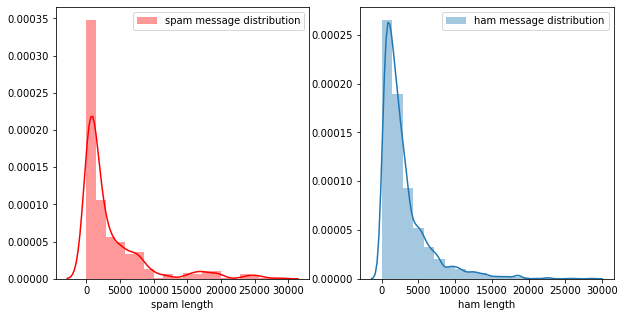

In [16]:
#message distribution before  cleaning
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.distplot(mail[mail['label']==1]['length'],bins=20,ax=ax[0],label='spam message distribution',color='r')

ax[0].set_xlabel('spam length')
ax[0].legend()

sns.distplot(mail[mail['label']==0]['length'],bins=20,ax=ax[1],label='ham message distribution')

ax[1].set_xlabel('ham length')
ax[1].legend()
plt.show()

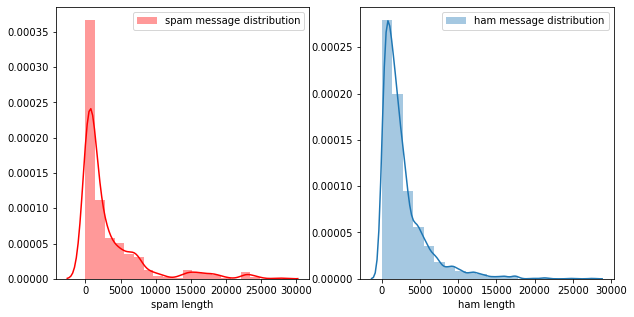

In [17]:
#message distribution after cleaning
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.distplot(mail[mail['label']==1]['clean_length'],bins=20,ax=ax[0],label='spam message distribution',color='r')

ax[0].set_xlabel('spam length')
ax[0].legend()

sns.distplot(mail[mail['label']==0]['clean_length'],bins=20,ax=ax[1],label='ham message distribution')

ax[1].set_xlabel('ham length')
ax[1].legend()
plt.show()
f.savefig('mail distribution')

UNDERSTANDING THE TEXT DATA AND FINDING THE IMPORTANT WORDS

In [18]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


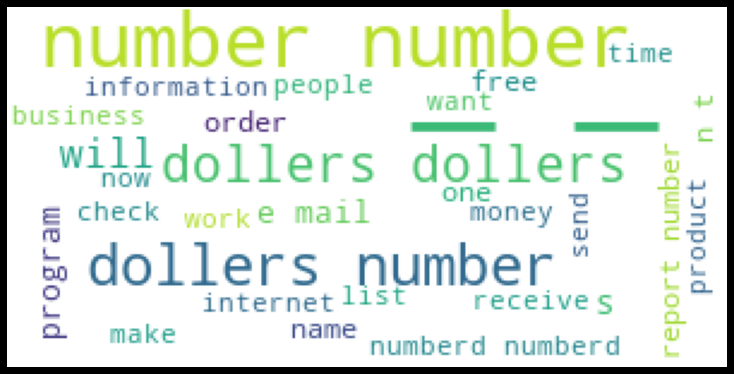

In [21]:
#loud words in spam
from wordcloud import WordCloud

spams=mail['message'][mail['label']==1]
spam_cloud=WordCloud(width=300,height=150,background_color='white',max_words=30).generate(''.join(spams))

plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

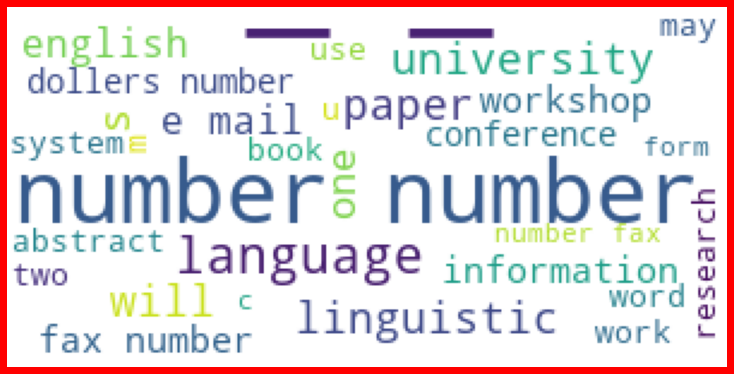

In [22]:
#loud words in ham

hams=mail['message'][mail['label']==0]
spam_cloud=WordCloud(width=300,height=150,background_color='white',max_words=30).generate(''.join(hams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

CONVERTING TEXT INTO VECTORS AND SPLITTING FEATURE AND LABEL

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

tf_vec=TfidfVectorizer()
naive=MultinomialNB()
features=tf_vec.fit_transform(mail['message'])

x=features
y=mail['label']

In [103]:
#train and predict
X_train,x_test,Y_train,y_test=train_test_split(x,y,random_state=43)
naive.fit(X_train,Y_train)

y_pred=naive.predict(x_test)

print('Final score =>',accuracy_score(y_test,y_pred))

Final score => 0.861878453038674


In [104]:
print(classification_report (y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       619
           1       1.00      0.05      0.09       105

    accuracy                           0.86       724
   macro avg       0.93      0.52      0.51       724
weighted avg       0.88      0.86      0.80       724



In [106]:
#confusion matrix heatmap

conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[619,   0],
       [100,   5]], dtype=int64)